This is described by an equation of the form
$$
\frac1{t^2} \frac{d}{dt}\left(t^2 \frac{d\theta}{dt}\right) + \theta^n = 0
$$

In [1]:
from integrators import contact as ic
from integrators.common import rk4

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fast') #alt: 'seaborn-white'

#plt.rcParams.update({'font.size': 20, 'font.family': 'serif', 'font.weight':'normal'})
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = "serif"
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['xtick.direction'] = "in"
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['ytick.direction'] = "in"
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['mathtext.fontset'] = "cm"

In [3]:
class LaneEmden:
    def __init__(self, n):
        self.n = n

    def f(self, t):
        return 2/t
    
    def V(self, q, t):
        return q**(self.n+1)/(self.n+1)
    
    def Vq(self, q, t):
        return q**self.n

In [4]:
def upper_error_bound(n, m, dt, p0, q0):
    return np.abs(
        dt * (21605+168*m*(1+m)*(-17+240*m*(1+m)))*p0/(15120*(1+2*m)**6)
        - dt**2 * (-15+28*m*(1+m)*(31+60*m*(1+m)))*q0**n/(315*(1+2*m)**5)
        + dt**3 * (559+336*m*(1+m)*(19+40*m*(1+m)))*n*p0*q0**(n-1)/(5040*(1+2*m)**4)
    )
        
def upper_error_bound_p(n, m, dt, p0, q0):
    return np.abs(
        2 * (141+28*m*(1+m)*(3+20*m*(1+m)))*p0/(105*(1+2*m)**7)
        + dt * (2617+120*m*(1+m)*(37+144*m*(m+1)))*q0**n/(2160*(1+2*m)**6)
        + dt**2 * (-15+28*m(1+m)*(31+60*m*(1+m)))*n*p0*q0**(n-1)/(315*(1+2*m)**5)
        + dt**3 * (n*q**(n-2)*(- (559+336*m*(1+m)*(19+40*m*(1+m)))*(-1+n)*p0**2
                               + (-505+336*m*(1+m)*(-1+40*m*(1+m)))*q0**(n+1))
                  )/(10080*(1+2*m)**4))

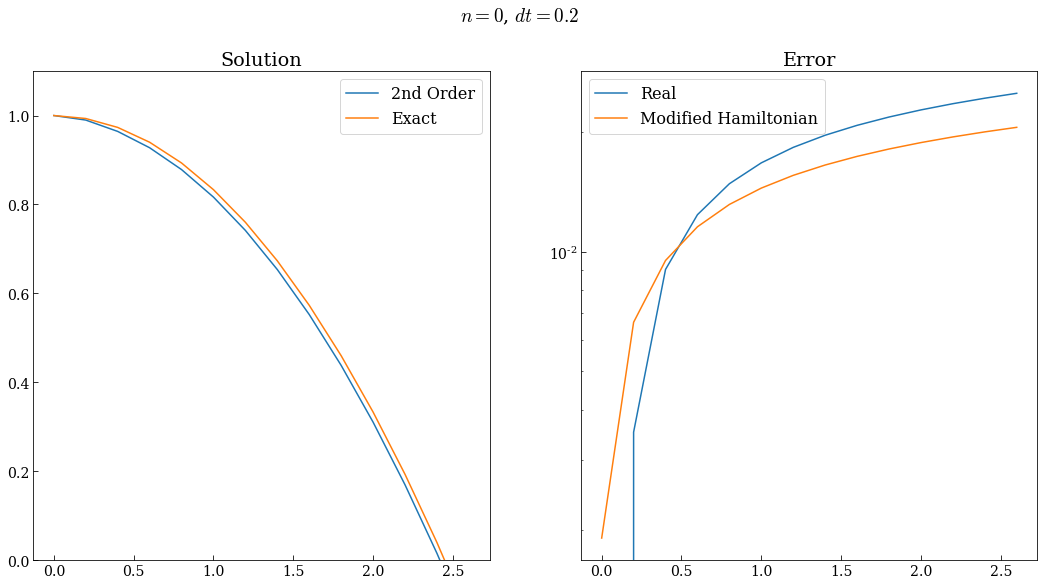

In [5]:
n = 0
le = LaneEmden(n)
dt = 0.2
tf = 2.7
p0, q0 = (0,1)
tspan = np.arange(0.0, tf, dt)

exact = lambda t: 1-1/6*t**2
errq = lambda m, p0, q0: upper_error_bound(n,m,dt,p0,q0)
errp = lambda m, p0, q0: upper_error_bound_p(n,m,dt,p0,q0)

plt.figure(figsize=(18,9))
plt.suptitle(f"$n={le.n}$, $dt={dt}$")
sol, _, _ = ic.integrate(ic.step, le, tspan, p0, q0, 0.0)

#p1, q1 = sol[:,0][1], sol[:,1][1]
#solm1, _, _ = ic.integrate(ic.step6, le, tspan[1:], p1, q1, 0.0)
#sole1, _, _ = ic.integrate(ic.step6e, le, tspan[1:], p1, q1, 0.0)

plt.subplot(121)
plt.title("Solution")
plt.plot(tspan,sol[:,1],label="2nd Order")
plt.plot(tspan, exact(tspan),
         label="Exact")
plt.ylim(0,1.1)
plt.legend()
    
plt.subplot(122)
plt.title("Error")
plt.plot(tspan,abs(sol[:,1]-exact(tspan)),label="Real")
plt.plot(tspan,np.cumsum([errq((m/dt),p0,q0) for m, p0, q0 in zip(tspan,sol[:,0],sol[:,1])]),
         label="Modified Hamiltonian")
plt.legend()
plt.yscale("log")
plt.legend()

plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


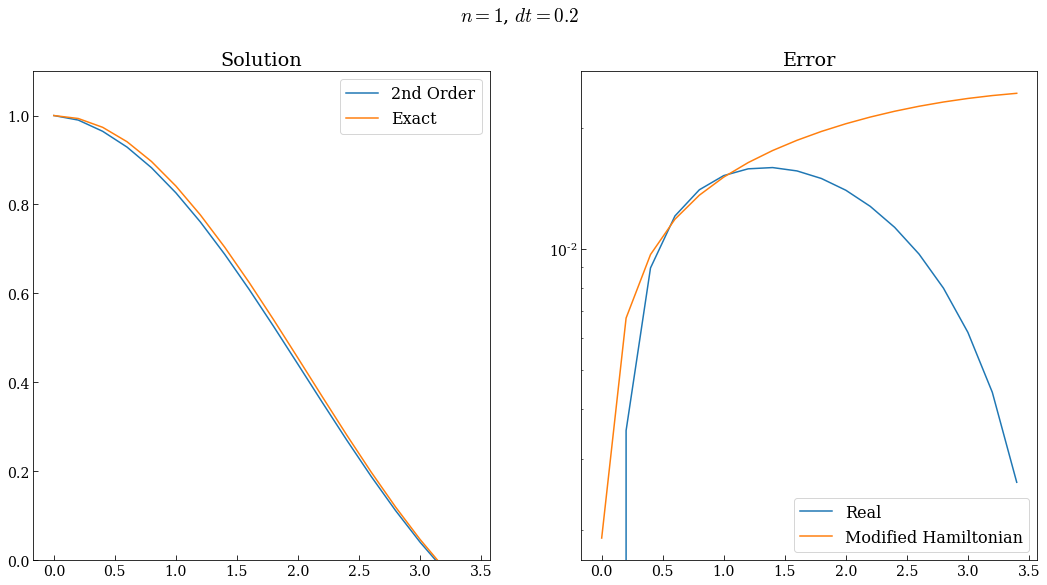

In [6]:
n = 1
le = LaneEmden(n)
dt = 0.2
tf = 3.5
p0, q0 = (0,1)
tspan = np.arange(0.0, tf, dt)

exact = lambda t: np.sin(t)/t
# Deal with limit t->0 by hand
exact = exact(tspan)
exact[0] = 1.0

errq = lambda m, p0, q0: upper_error_bound(n,m,dt,p0,q0)
errp = lambda m, p0, q0: upper_error_bound_p(n,m,dt,p0,q0)

plt.figure(figsize=(18,9))
plt.suptitle(f"$n={le.n}$, $dt={dt}$")
sol, _, _ = ic.integrate(ic.step, le, tspan, p0, q0, 0.0)

#p1, q1 = sol[:,0][1], sol[:,1][1]
#solm1, _, _ = ic.integrate(ic.step6, le, tspan[1:], p1, q1, 0.0)
#sole1, _, _ = ic.integrate(ic.step6e, le, tspan[1:], p1, q1, 0.0)

plt.subplot(121)
plt.title("Solution")
plt.plot(tspan,sol[:,1],label="2nd Order")
plt.plot(tspan, exact,
         label="Exact")
plt.ylim(0,1.1)
plt.legend()
    
plt.subplot(122)
plt.title("Error")
plt.plot(tspan,abs(sol[:,1]-exact),label="Real")
plt.plot(tspan,np.cumsum([errq((m/dt),p0,q0) for m, p0, q0 in zip(tspan,sol[:,0],sol[:,1])]),
         label="Modified Hamiltonian")
plt.legend()
plt.yscale("log")
plt.legend()

plt.show()

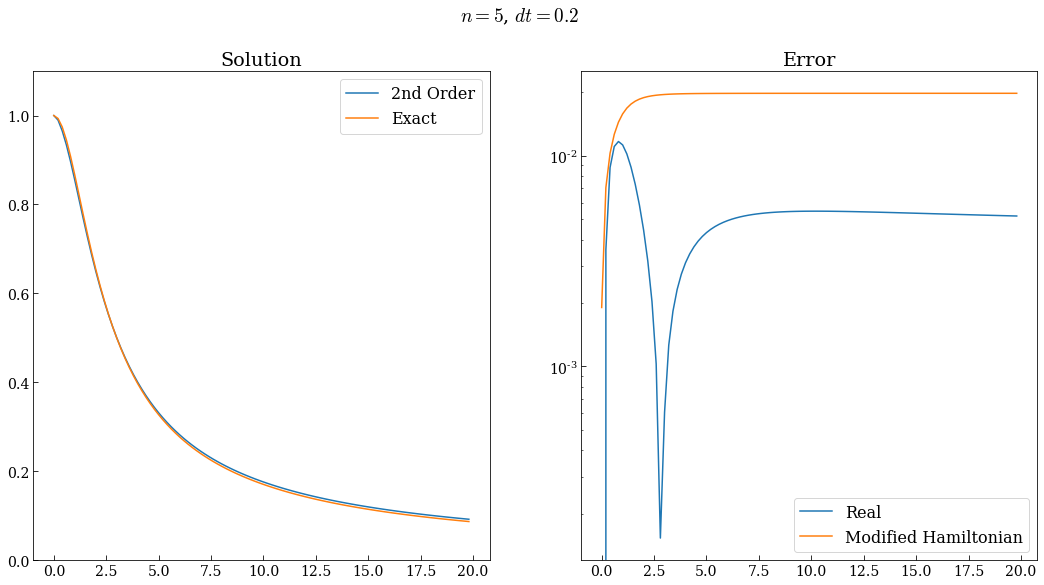

In [7]:
n=5
le = LaneEmden(n)
dt = 0.2
tf = 20.0
p0, q0 = (0,1)
tspan = np.arange(0.0, tf, dt)

exact = lambda t: 1/np.sqrt(1 + t**2/3)
errq = lambda m, p0, q0: upper_error_bound(n,m,dt,p0,q0)
errp = lambda m, p0, q0: upper_error_bound_p(n,m,dt,p0,q0)

plt.figure(figsize=(18,9))
plt.suptitle(f"$n={le.n}$, $dt={dt}$")
sol, _, _ = ic.integrate(ic.step, le, tspan, p0, q0, 0.0)

#p1, q1 = sol[:,0][1], sol[:,1][1]
#solm1, _, _ = ic.integrate(ic.step6, le, tspan[1:], p1, q1, 0.0)
#sole1, _, _ = ic.integrate(ic.step6e, le, tspan[1:], p1, q1, 0.0)

plt.subplot(121)
plt.title("Solution")
plt.plot(tspan,sol[:,1],label="2nd Order")
plt.plot(tspan, exact(tspan),
         label="Exact")
plt.ylim(0,1.1)
plt.legend()
    
plt.subplot(122)
plt.title("Error")
plt.plot(tspan,abs(sol[:,1]-exact(tspan)),label="Real")
plt.plot(tspan,np.cumsum([errq((m/dt),p0,q0) for m, p0, q0 in zip(tspan,sol[:,0],sol[:,1])]),
         label="Modified Hamiltonian")
plt.legend()
plt.yscale("log")
plt.legend()

plt.show()